In [290]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.utils import resample
from sklearn.svm import SVC, LinearSVC
from imblearn.over_sampling import SMOTE
import seaborn as sns

In [253]:
readmit = pd.read_csv('./readmit_data.csv')
readmit.shape
holdout = pd.read_csv('./holdout.csv')
holdout.shape

(15265, 55)

In [254]:
readmit['vistits'] = readmit.groupby('patient_nbr')['patient_nbr'].transform('count')
readmit['vistits'].describe()
readmit['vistits'].value_counts()

1     49436
2     17508
3      8052
4      4388
5      2565
6      1524
7       959
8       584
9       324
10      230
11      165
12      156
15      120
17      102
14       84
13       78
19       57
18       36
16       32
31       31
25       25
23       23
21       21
Name: vistits, dtype: int64

In [230]:
holdout['vistits'] = holdout.groupby('patient_nbr')['patient_nbr'].transform('count')
holdout['vistits'].describe()

count    15265.000000
mean         1.194170
std          0.567766
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          9.000000
Name: vistits, dtype: float64

In [255]:
readmit = readmit.drop(['Unnamed: 0','encounter_id','patient_nbr'],axis = 1)
readmit.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'target', 'self_pay',
       'medicaid/medicare', 'coverByInsurance', 'f_diag', 's_diag', 't_diag',
       'clustering3', 'clustering4', 'clustering2', 'vistits'],
      dtype='object')

In [231]:
holdout = holdout.drop(['Unnamed: 0','encounter_id','patient_nbr'],axis = 1)
holdout.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'target', 'self_pay',
       'medicaid/medicare', 'coverByInsurance', 'f_diag', 's_diag', 't_diag',
       'clustering3', 'clustering4', 'clustering2', 'vistits'],
      dtype='object')

In [201]:
readmit.shape

(86500, 53)

In [256]:
num_columns = list(readmit.select_dtypes("int64").columns)
num_columns.remove('admission_type_id')
num_columns.remove('discharge_disposition_id')
num_columns.remove('admission_source_id')
num_columns.remove('target')
num_columns.remove('self_pay')
num_columns.remove('medicaid/medicare')
num_columns.remove('coverByInsurance')
num_columns.remove('clustering3')
num_columns.remove('clustering4')
num_columns.remove('clustering2')
num_columns.remove('vistits')
#num_columns.remove('patient_nbr')

xnames = []
for i in readmit.columns:
    if i != 'target':
        xnames.append(i)
x = readmit[xnames]
y = readmit['target']
for i in num_columns:
    print(type(i))
    
num_columns

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


['time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses']

In [251]:
num_columns_h = list(holdout.select_dtypes("int64").columns)
num_columns_h.remove('admission_type_id')
num_columns_h.remove('discharge_disposition_id')
num_columns_h.remove('admission_source_id')
num_columns_h.remove('target')
num_columns_h.remove('self_pay')
num_columns_h.remove('medicaid/medicare')
num_columns_h.remove('coverByInsurance')
num_columns_h.remove('clustering3')
num_columns_h.remove('clustering4')
num_columns_h.remove('clustering2')
num_columns_h.remove('vistits')
#num_columns.remove('patient_nbr')

xnames_h = []
for i in holdout.columns:
    if i != 'target':
        xnames_h.append(i)
x_h = holdout[xnames_h]
y_h = holdout['target']
#for i in num_columns_h:
    #print(type(i))


In [257]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_std = x.copy()
x_std[num_columns] = scale.fit_transform(x_std[num_columns])
x_std.shape
x_std.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'self_pay',
       'medicaid/medicare', 'coverByInsurance', 'f_diag', 's_diag', 't_diag',
       'clustering3', 'clustering4', 'clustering2', 'vistits'],
      dtype='object')

In [234]:
x_std_h = x.copy()
x_std_h[num_columns_h] = scale.fit_transform(x_std_h[num_columns_h])
x_std_h.shape
x_std_h.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'self_pay',
       'medicaid/medicare', 'coverByInsurance', 'f_diag', 's_diag', 't_diag',
       'clustering3', 'clustering4', 'clustering2', 'vistits'],
      dtype='object')

In [235]:
all_list_h = list(holdout.select_dtypes("int64").columns)
catogry_name_h = []
for i in all_list_h:
    if i not in num_columns_h and i != 'target':
        catogry_name_h.append(i)
catogry_name_h

['admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'self_pay',
 'medicaid/medicare',
 'coverByInsurance',
 'clustering3',
 'clustering4',
 'clustering2',
 'vistits']

In [258]:
x_std[catogry_name] = x_std[catogry_name].astype("str")
x_std.dtypes

race                         object
gender                       object
age                          object
admission_type_id            object
discharge_disposition_id     object
admission_source_id          object
time_in_hospital            float64
medical_specialty            object
num_lab_procedures          float64
num_procedures              float64
num_medications             float64
number_outpatient           float64
number_emergency            float64
number_inpatient            float64
number_diagnoses            float64
max_glu_serum                object
A1Cresult                    object
metformin                    object
repaglinide                  object
nateglinide                  object
chlorpropamide               object
glimepiride                  object
acetohexamide                object
glipizide                    object
glyburide                    object
tolbutamide                  object
pioglitazone                 object
rosiglitazone               

In [236]:
x_std_h[catogry_name_h] = x_std_h[catogry_name_h].astype("str")
x_std_h.dtypes

race                         object
gender                       object
age                          object
admission_type_id            object
discharge_disposition_id     object
admission_source_id          object
time_in_hospital            float64
medical_specialty            object
num_lab_procedures          float64
num_procedures              float64
num_medications             float64
number_outpatient           float64
number_emergency            float64
number_inpatient            float64
number_diagnoses            float64
max_glu_serum                object
A1Cresult                    object
metformin                    object
repaglinide                  object
nateglinide                  object
chlorpropamide               object
glimepiride                  object
acetohexamide                object
glipizide                    object
glyburide                    object
tolbutamide                  object
pioglitazone                 object
rosiglitazone               

In [259]:
#onehotec = OneHotEncoder()
#label = LabelEncoder()
#cnames = []
#for i in x_std.columns:
    #if i not in num_columns:
        #cnames.append(i)
#rnames = x_std.columns
#cnames
#for i in cnames:
    #x_std[i] = label.fit_transform(x_std[i])
#x_std.head()
dummied_x = pd.get_dummies(x_std, drop_first = True)
dummied_x.shape
#new_x = x_std.copy()
#new_x[cnames] = onehotec.fit (86500, 210)
#dummied_x

(86500, 280)

In [237]:
dummied_x_h = pd.get_dummies(x_std_h, drop_first = True)
dummied_x_h.shape

(15265, 237)

In [312]:
x_train, x_test, y_train, y_test = train_test_split(dummied_x, y, train_size=0.5, test_size=0.5)
x_train.shape

(43250, 280)

In [91]:
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_pca, y, train_size=0.5, test_size=0.5)

In [187]:
x_train

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,...,diabetesMed,self_pay,medicaid/medicare,coverByInsurance,f_diag,s_diag,t_diag,clustering3,clustering4,clustering2
51990,32433957,Caucasian,Female,[80-90),1,3,7,-0.131168,No,0.098116,...,No,0,1,0,diseases of the musculoskeletal system and con...,diseases of the respiratory system,injury and poisoning,1,1,1
27126,72056583,AfricanAmerican,Female,[80-90),1,4,7,0.539044,No,0.352230,...,Yes,0,1,0,"endocrine, nutritional and metabolic diseases,...",diseases of the respiratory system,diseases of the respiratory system,1,1,1
76038,109423098,Caucasian,Male,[40-50),6,1,17,-0.131168,Family/GeneralPractice,0.657166,...,Yes,0,0,0,diseases of the circulatory system,diseases of the genitourinary system,infectious and parasitic diseases,1,3,1
79245,97522011,Caucasian,Female,[50-60),1,1,7,-0.131168,InternalMedicine,0.606344,...,No,0,0,1,diseases of the respiratory system,mental disorders,"endocrine, nutritional and metabolic diseases,...",0,2,0
46372,15674760,Caucasian,Female,[80-90),2,3,4,0.874149,Surgery-Cardiovascular/Thoracic,0.199761,...,Yes,0,1,0,diseases of the circulatory system,diseases of the circulatory system,diseases of the circulatory system,2,0,0
79532,64935135,Caucasian,Male,[50-60),1,5,7,-1.136485,No,-0.155998,...,No,0,1,0,diseases of the circulatory system,mental disorders,diseases of the blood and blood-forming organs,1,1,1
82042,92752767,Caucasian,Female,[80-90),2,3,7,-0.131168,Emergency/Trauma,-2.138088,...,Yes,0,1,0,diseases of the genitourinary system,"endocrine, nutritional and metabolic diseases,...",diseases of the circulatory system,0,2,0
73767,41659506,Caucasian,Male,[60-70),1,6,7,0.874149,No,0.758812,...,Yes,1,0,0,"endocrine, nutritional and metabolic diseases,...",diseases of the skin and subcutaneous tissue,diseases of the skin and subcutaneous tissue,0,2,0
28730,40711680,Caucasian,Female,[50-60),3,1,1,-0.466273,No,-1.019986,...,Yes,0,1,0,"endocrine, nutritional and metabolic diseases,...",diseases of the genitourinary system,diseases of the circulatory system,1,1,1
61883,90374067,Caucasian,Female,[70-80),3,3,7,-0.466273,Emergency/Trauma,-0.155998,...,Yes,1,0,0,"symptoms, signs, and ill-defined conditions",injury and poisoning,injury and poisoning,0,1,1


In [191]:
#x_train['vistits'] = x_train.groupby('patient_nbr')['patient_nbr'].transform('count')
#x_test['vistits'] = x_test.groupby('patient_nbr')['patient_nbr'].transform('count')
#x_train['vistits'].describe()
#x_test
#readmit['vistits'].value_counts()

/Users/heqianli/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/heqianli/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,...,self_pay,medicaid/medicare,coverByInsurance,f_diag,s_diag,t_diag,clustering3,clustering4,clustering2,vistits
48574,40826871,Caucasian,Male,[30-40),1,1,7,-1.136485,No,0.606344,...,1,0,0,"endocrine, nutritional and metabolic diseases,...",diseases of the digestive system,"endocrine, nutritional and metabolic diseases,...",0,2,0,2
55775,87005934,Caucasian,Female,[80-90),2,6,1,0.539044,InternalMedicine,0.148938,...,0,1,0,diseases of the musculoskeletal system and con...,diseases of the circulatory system,"endocrine, nutritional and metabolic diseases,...",1,3,1,1
49227,37792872,Hispanic,Female,[30-40),2,22,7,1.209255,Emergency/Trauma,1.978559,...,1,0,0,diseases of the circulatory system,diseases of the circulatory system,mental disorders,0,2,0,1
31310,85344291,Caucasian,Male,[70-80),1,6,7,-0.131168,No,0.250584,...,0,1,0,diseases of the respiratory system,diseases of the respiratory system,diseases of the skin and subcutaneous tissue,0,2,1,1
12909,23240313,AfricanAmerican,Female,[50-60),2,11,1,0.874149,Oncology,0.250584,...,0,0,1,diseases of the genitourinary system,neoplasms,diseases of the circulatory system,0,2,0,2
54012,3186810,Caucasian,Female,[70-80),3,1,1,-1.136485,No,-2.138088,...,0,0,0,external causes of injury and supplemental cla...,diseases of the respiratory system,"endocrine, nutritional and metabolic diseases,...",2,0,0,1
56976,23697441,Caucasian,Female,[60-70),5,2,17,-1.136485,Cardiology,-1.579037,...,0,0,1,diseases of the circulatory system,diseases of the circulatory system,"endocrine, nutritional and metabolic diseases,...",2,0,0,1
59097,19952802,Caucasian,Female,[50-60),3,1,1,-0.801379,Orthopedics-Reconstructive,0.352230,...,0,0,0,injury and poisoning,"endocrine, nutritional and metabolic diseases,...",diseases of the circulatory system,2,0,0,1
78411,41101785,Caucasian,Male,[60-70),3,1,1,0.539044,Urology,1.267040,...,0,1,0,congenital anomalies,diseases of the genitourinary system,diseases of the genitourinary system,0,2,0,1
68342,62458200,Caucasian,Male,[60-70),2,1,7,-1.136485,Family/GeneralPractice,1.267040,...,0,0,1,injury and poisoning,external causes of injury and supplemental cla...,neoplasms,2,0,0,1


In [193]:
#x_train['vistits'] = x_train['vistits'].astype("str")
#x_test['vistits'] = x_test['vistits'].astype("str")
#x_train.dtypes

/Users/heqianli/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/heqianli/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


patient_nbr                   int64
race                         object
gender                       object
age                          object
admission_type_id            object
discharge_disposition_id     object
admission_source_id          object
time_in_hospital            float64
medical_specialty            object
num_lab_procedures          float64
num_procedures              float64
num_medications             float64
number_outpatient           float64
number_emergency            float64
number_inpatient            float64
number_diagnoses            float64
max_glu_serum                object
A1Cresult                    object
metformin                    object
repaglinide                  object
nateglinide                  object
chlorpropamide               object
glimepiride                  object
acetohexamide                object
glipizide                    object
glyburide                    object
tolbutamide                  object
pioglitazone                

In [196]:
#dummied_x_train = pd.get_dummies(x_train, drop_first = True)
#dummied_x_test = pd.get_dummies(x_test, drop_first = True)
#dummied_x.shape
#dummied_x_train.shape
#dummied_x_test.shape

(25950, 248)

In [313]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
x_train_under, y_train_under = rus.fit_sample(x_train, y_train)
#x_train_under.shape
x_train_under.shape

(9686, 280)

In [239]:
rus = RandomUnderSampler(random_state=0)
x_train_under_h, y_train_under_h = rus.fit_sample(x_train, y_train)
#x_train_under.shape
x_train_under_h.shape

(1720, 237)

In [329]:
sm = SMOTE(random_state=42)

x_sm, y_sm = sm.fit_sample(x_train, y_train)

lsvc = LinearSVC(class_weight = "balanced")
svc = SVC(class_weight = "balanced")
x_sm.shape

(76814, 280)

In [211]:
from sklearn import model_selection
grid_para_svm =[
    {'C': [1, 10, 100, 1000],
     'gamma': [0.001, 0.0001],
     'kernel': ['rbf']},
    {
      'C': [1, 10, 100, 1000],
    'kernel': ['linear']
    }
]
grid_para_lsvm = [{'C':[0.001,0.01,0.1]}]

In [342]:
grid_search_svm = model_selection.GridSearchCV(svc, grid_para_svm, scoring='accuracy', cv=3, return_train_score=True)
#grid_search_lsvm = model_selection.GridSearchCV(lsvc, grid_para_lsvm, scoring='accuracy', cv=3, return_train_score=True)
grid_search_svm.fit(x_train_under, y_train_under)
#grid_search_lsvm.fit(x_train_under, y_train_under)
                                               
                                               

GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['poly'], 'degree': [1, 2, 3]}, {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [344]:
grid_search_svm.best_params_
#svc.fit(x_train_upsample, y_train_upsample)


{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [346]:
grid_search_svm.best_score_

0.6826347305389222

In [332]:
lsvc = LinearSVC(C=0.1) #penalty = 'l1',loss = 'l2', dual = False)

In [333]:
lsvc.fit(x_train_under, y_train_under)

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [ ]:
svc = SVC(C = 1000, kernel = 'linear',class_weight = "balanced",probability = True)
svc.fit(x_train_under,y_train_under)

In [240]:
svc = SVC(C = 1000, gamma = 0.001, class_weight = "balanced",kernel probability = True)
svc.fit(x_train_under_h,y_train_under_h)

SVC(C=1000, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [52]:
svc.score(x_sm,y_sm)

0.6114837636169825

In [213]:
svc.score(x_train_under,y_train_under)

0.7347915746059802

In [40]:
lsvc.score(x_sm, y_sm)

0.6265967687384552

In [31]:
print(list(grid_search_svm.cv_results_.keys()))
grid_search_svm.cv_results_

NameError: name 'grid_search_svm' is not defined

In [221]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, recall_score,roc_auc_score, precision_score, accuracy_score

In [215]:
#auc = [0.5964666436831944]
#auc.append(roc_auc_score(y_score=svc.predict(x_test), y_true=y_test))
#auc
roc_auc_score(y_score=svc.predict(x_test), y_true=y_test)
#0.685901439802655
#0.6909848075192047

0.6866101405141911

In [242]:
print("auc train score: ", roc_auc_score(y_train_under_h, svc.predict_proba(x_train_under_h)[:,1]))
print("auc test score: ",roc_auc_score(y_test, svc.predict_proba(x_test)[:,1]))
print("recall train score: ",recall_score(y_train_under_h, svc.predict(x_train_under_h)))
print("recall test score: ",recall_score(y_test, svc.predict(x_test)))
print("precision train score: ", precision_score(y_train_under_h, svc.predict(x_train_under_h)))
print("precision test score: ",precision_score(y_test, svc.predict(x_test)))
print("accuracy train score: ",accuracy_score(y_train_under_h, svc.predict(x_train_under_h)))
print("accuracy test score: ",accuracy_score(y_test, svc.predict(x_test)))
print(confusion_matrix(y_test, svc.predict(x_test)))

auc train score:  0.8926352082206599
auc test score:  0.6661673574272293
recall train score:  0.7895348837209303
recall test score:  0.5995260663507109
precision train score:  0.8300733496332519
precision test score:  0.17334703665638918
accuracy train score:  0.813953488372093
accuracy test score:  0.6395912485261365
[[4376 2413]
 [ 338  506]]


In [336]:
print("auc train score: ", roc_auc_score(y_train_under, lsvc.predict(x_train_under)))
print("auc test score: ",roc_auc_score(y_test, lsvc.predict(x_test)))
print("recall train score: ",recall_score(y_train_under, lsvc.predict(x_train_under)))
print("recall test score: ",recall_score(y_test, lsvc.predict(x_test)))
print("precision train score: ", precision_score(y_train_under, lsvc.predict(x_train_under)))
print("precision test score: ",precision_score(y_test, lsvc.predict(x_test)))
print("accuracy train score: ",accuracy_score(y_train_under, lsvc.predict(x_train_under)))
print("accuracy test score: ",accuracy_score(y_test, lsvc.predict(x_test)))
print(confusion_matrix(y_test, lsvc.predict(x_test)))

auc train score:  0.6943010530662812
auc test score:  0.6928963192360695
recall train score:  0.7319843072475738
recall test score:  0.7282744282744282
precision train score:  0.6806835637480799
precision test score:  0.2101631869450444
accuracy train score:  0.6943010530662812
accuracy test score:  0.6653872832369943
[[25275 13165]
 [ 1307  3503]]


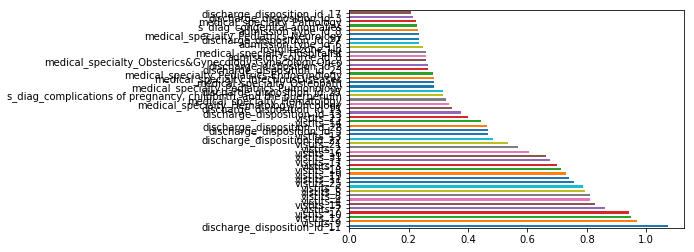

In [343]:
pd.Series(abs(lsvc.coef_[0]), index=dummied_x.columns).nlargest(50).plot(kind='barh')

In [315]:
cm = confusion_matrix(y_test, svc.predict(x_test))
#sn.heatmap(cm, annot=True)

NameError: name 'sn' is not defined

In [317]:
cm

array([[24774, 13666],
       [ 1196,  3614]])

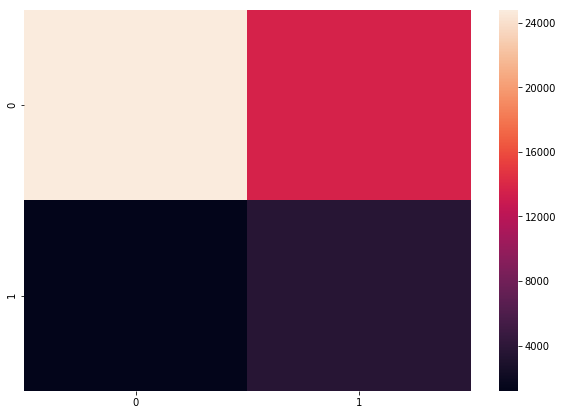

In [321]:
plt.figure(figsize = (10,7))
sns.heatmap(cm)

In [96]:
roc_auc_score(y_score=svc.predict(x_test_pca), y_true=y_test_pca)

0.5946008922458217

In [173]:
y_score=svc.predict(x_test)
y_true=y_test
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_score)

array([[24094, 14317],
       [ 1187,  3652]])

In [161]:
no = 0
yes = 0
for i in y_true['target']:
    if i == '0':
        no +=1
    if i == '1':
        yes +=1
print(no,yes)
y_true['target'].value_counts

0 0


<bound method IndexOpsMixin.value_counts of 23311    0
32901    0
58521    0
83427    0
67296    0
12019    0
6370     0
57628    0
20570    1
19061    0
16968    0
78063    0
78691    0
29632    0
58060    0
24626    0
14588    0
54811    0
52050    1
80092    0
52220    0
23426    0
65152    1
39107    0
42862    0
21372    0
44156    0
78826    0
5670     0
6126     0
        ..
11007    0
77066    0
58211    1
59459    0
25302    0
76379    0
9734     0
26604    0
29470    0
64754    0
55352    0
64555    0
35252    0
66168    0
1713     0
19830    0
52478    0
68528    0
18028    1
28113    0
53578    0
72631    0
34577    0
53450    0
78429    0
85913    0
45442    0
32908    0
36009    0
56363    0
Name: target, Length: 43250, dtype: int64>

In [220]:
recall_score(y_true, y_score)

NameError: name 'recall_score' is not defined

In [216]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_true, y_score, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.95      0.63      0.76     38411
    class 1       0.20      0.75      0.32      4839

avg / total       0.87      0.64      0.71     43250



In [85]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(dummied_x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [86]:
pca.explained_variance_ratio_

array([1.18437919e-01, 8.06744237e-02, 6.05588250e-02, 5.76660163e-02,
       4.99732328e-02, 4.28865657e-02, 3.99212770e-02, 3.57236250e-02,
       2.81534466e-02, 2.41002254e-02, 2.03276494e-02, 1.94986932e-02,
       1.84596844e-02, 1.65650595e-02, 1.52549242e-02, 1.48355563e-02,
       1.41772562e-02, 1.29546908e-02, 1.26278355e-02, 1.21476770e-02,
       1.19011777e-02, 1.12320758e-02, 1.07277167e-02, 1.00254781e-02,
       9.63456106e-03, 9.44648906e-03, 8.95071779e-03, 8.82346101e-03,
       8.03658211e-03, 7.85090160e-03, 7.76373707e-03, 7.41719632e-03,
       7.21265238e-03, 7.09128781e-03, 6.41404931e-03, 6.26255274e-03,
       6.17781414e-03, 5.62065369e-03, 5.46411568e-03, 5.31969861e-03,
       4.99130194e-03, 4.80945040e-03, 4.43372104e-03, 4.36273312e-03,
       4.24795907e-03, 3.90665562e-03, 3.72017426e-03, 3.62362732e-03,
       3.35734471e-03, 3.27603567e-03, 3.10548752e-03, 3.03145569e-03,
       2.90623498e-03, 2.78403855e-03, 2.75377583e-03, 2.55872267e-03,
      

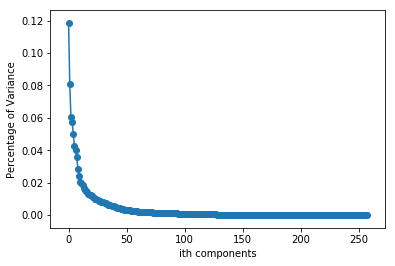

In [88]:
pca.set_params(n_components=None)
pca.fit(dummied_x)
plt.plot(range(258), pca.explained_variance_ratio_)
plt.scatter(range(258), pca.explained_variance_ratio_)
plt.xlabel('ith components')
plt.ylabel('Percentage of Variance')
plt.show()

In [89]:
ratio = 0
num = 0
for i in pca.explained_variance_ratio_:
    if ratio < 0.9:
        ratio += i
        num += 1
print(num,ratio)

51 0.9001519927803671


In [90]:
n_components=51
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True)
pca.fit(dummied_x)
x_pca = pca.transform(dummied_x)

In [227]:
import pickle

In [228]:
with open('svc_pickle', 'wb') as picklefile:
    pickle.dump(svc, picklefile)

In [243]:
loadmodel = pickle.load(open('svc_pickle', 'rb'))

In [271]:
prob = loadmodel.predict_proba(dummied_x)[:,1]


In [272]:
len(prob)

86500

In [283]:
risk_dataset = readmit.copy()
risk_dataset.shape

(86500, 53)

In [285]:
risk_dataset['proability'] = loadmodel.predict_proba(dummied_x)[:,1]
risk_dataset['proability'] = (risk_dataset['proability']*100).astype('int')

In [275]:
#risk_dataset['target'] = y

In [328]:
riskp = []
number0 = []
number1 = []
ratio = []
for i in range(80, 97):
    print("risk", i)
    #riskp.append(i)
    print(risk_dataset['target'][risk_dataset['proability'] == i].value_counts())
    print("ratio",risk_dataset['target'][risk_dataset['proability'] == i].value_counts()[1]/sum(risk_dataset['target'][risk_dataset['proability'] > i].value_counts())) 
    ratio1 = risk_dataset['target'][risk_dataset['proability'] == i].value_counts()[1]/sum(risk_dataset['target'][risk_dataset['proability'] > i].value_counts())
    ratio.append(ratio1)
ratio
    
    
    

risk 80
0    230
1     99
Name: target, dtype: int64
ratio 0.06051344743276284
risk 81
0    161
1    115
Name: target, dtype: int64
ratio 0.08455882352941177
risk 82
0    144
1     90
Name: target, dtype: int64
ratio 0.07992895204262877
risk 83
0    107
1     87
Name: target, dtype: int64
ratio 0.09334763948497854
risk 84
0    90
1    69
Name: target, dtype: int64
ratio 0.08926261319534282
risk 85
0    82
1    55
Name: target, dtype: int64
ratio 0.08647798742138364
risk 86
0    64
1    37
Name: target, dtype: int64
ratio 0.0691588785046729
risk 87
1    47
0    42
Name: target, dtype: int64
ratio 0.10538116591928251
risk 88
0    44
1    28
Name: target, dtype: int64
ratio 0.0748663101604278
risk 89
0    46
1    26
Name: target, dtype: int64
ratio 0.08609271523178808
risk 90
0    28
1    26
Name: target, dtype: int64
ratio 0.10483870967741936
risk 91
1    36
0    32
Name: target, dtype: int64
ratio 0.2
risk 92
0    35
1    26
Name: target, dtype: int64
ratio 0.2184873949579832
risk 93
0 

[0.06051344743276284,
 0.08455882352941177,
 0.07992895204262877,
 0.09334763948497854,
 0.08926261319534282,
 0.08647798742138364,
 0.0691588785046729,
 0.10538116591928251,
 0.0748663101604278,
 0.08609271523178808,
 0.10483870967741936,
 0.2,
 0.2184873949579832,
 0.35384615384615387,
 0.23684210526315788,
 0.9166666666666666,
 0.5]

In [294]:
risk_dataset_1 = risk_dataset[risk_dataset['proability'] > 80]
#risk_dataset_1 = risk_dataset[risk_dataset[]]
risk_dataset_1.columns

SyntaxError: invalid syntax (<ipython-input-294-d9cd8da381d4>, line 2)

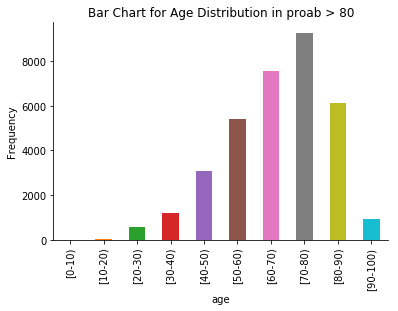

In [296]:
age_group = risk_dataset_1.groupby(['age']).size()
age_group.plot(kind = 'bar')
sns.despine()
plt.ylabel('Frequency')
plt.title('Bar Chart for Age Distribution in proab > 80')
plt.show()

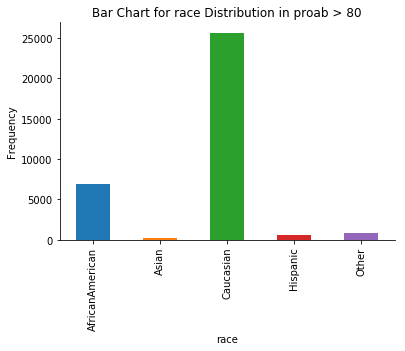

In [297]:
race_group = risk_dataset_1.groupby(['race']).size()
race_group.plot(kind = 'bar')
sns.despine()
plt.ylabel('Frequency')
plt.title('Bar Chart for race Distribution in proab > 80')
plt.show()

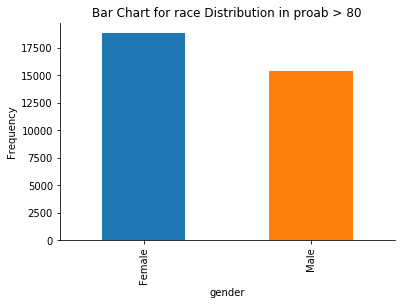

In [300]:
gender_group = risk_dataset_1.groupby(['gender']).size()
gender_group.plot(kind = 'bar')
sns.despine()
plt.ylabel('Frequency')
plt.title('Bar Chart for race Distribution in proab > 80')
plt.show()

In [298]:
risk_dataset_1.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'target', 'self_pay',
       'medicaid/medicare', 'coverByInsurance', 'f_diag', 's_diag', 't_diag',
       'clustering3', 'clustering4', 'clustering2', 'vistits', 'proability'],
      dtype='object'

NameError: name 'value_height' is not defined

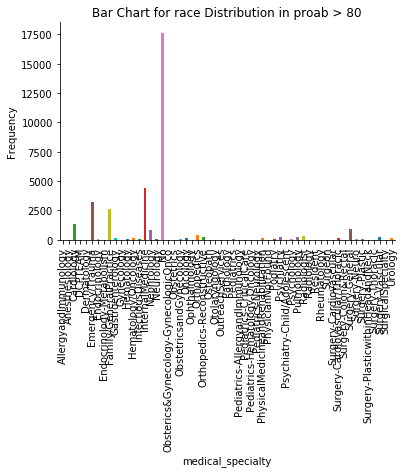

<Figure size 432x288 with 0 Axes>

In [306]:
medical_specialty_group = risk_dataset_1.groupby(['medical_specialty']).size()
medical_specialty_group.plot(kind = 'bar')
sns.despine()
plt.ylabel('Frequency')
plt.title('Bar Chart for race Distribution in proab > 80')
fig = plt.figure()
fig.set_figheight(value_height)
fig.set_figwidth(value_width)
plt.show()

In [324]:
prob = loadmodel.predict_proba(dummied_x)

In [325]:
prob

array([[0.35306474, 0.64693526],
       [0.2416661 , 0.7583339 ],
       [0.17821315, 0.82178685],
       ...,
       [0.670665  , 0.329335  ],
       [0.76751026, 0.23248974],
       [0.69610504, 0.30389496]])

In [ ]:
dsa = pd.qcut(loadmodel.predict_proba(dummied_x)[:,1],q=100)